<a href="https://colab.research.google.com/github/laptionok/SB_Data-analysis/blob/main/4.10_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D1%83.%20%D0%94%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB%D1%8B.%20%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика по базовой математической статистике для Data scientist

# Практика 3 - построение доверительной оценки

На практическом занятии научимся строить доверительные интервалы и выделять аномалии при помощи python.

- Строим доверительный интервал для цен акций из yahoo finance при помощи scipy, numpy, pandas
-  Делаем выводы по наличию или отсутствию аномальных событий

Для начала импортируем все полезные библитеки и настроим ноутбук

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
from scipy import *
import warnings
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 7.0)
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


В этой практике мы поработаем с реальными финансовыми данными.
Наверняка каждый из нас хоть раз покупал доллары в надежде немного заработать на разнице курсов покупки и продажи. Но не каждый знает, что помимо валют есть ещё и другие финансовые инструменты - например, акции или облигации, с которыми работают профессиональные инвесторы на специальной площадке для купли и продаже - бирже.

Данные о ценах финансовых инструментов называются котировками, и сегодня мы с вами представим себя инвесторами и проанализируем реальные котировки самых настоящих акций.

Мы будем доставать их из сервиса yahoo finance, и для этого помощи bash магии установим несколько нужных библиотек.

In [ ]:
%%bash
pip install yfinance



In [ ]:
%%bash
pip install pandas-datareader

In [ ]:
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

In [ ]:
# Собираем котировки за интересующий период.
start_date = datetime(2018, 1, 1)
end_date = datetime(2019, 8, 31)

In [ ]:
df = yf.download("GOOG", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 419 entries, 2018-01-02 to 2019-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       419 non-null    float64
 1   High       419 non-null    float64
 2   Low        419 non-null    float64
 3   Close      419 non-null    float64
 4   Adj Close  419 non-null    float64
 5   Volume     419 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 22.9 KB


In [ ]:
# Переведем заголовки столбцов в нижний регистр и посмотрим на данные
df.columns = map(str.lower, df.columns)
df.head()

,open,high,low,close,adj close,volume
Date,,,,,,
2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


Для изучения выберем разницу между ценой закрытия и ценой открытия.

In [ ]:
# Готовим новую метрику.
df["diff_price"] = df.close - df.open

Для построения доверительного интервала необходимо, чтобы исследумая величина была распределена по Гауссову закону.
Поэтому воспользуемся функцией из первой практики для разведочного анализа.

Text(0.5, 1.0, 'График разницы между ценой закрытия и открытия')

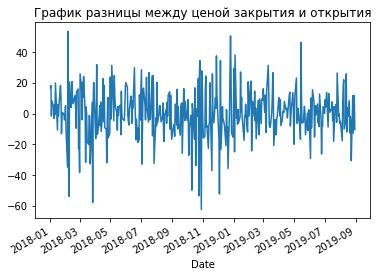

In [ ]:
df.diff_price.plot()
plt.title("График разницы между ценой закрытия и открытия")

In [ ]:
def my_basic_research(df=df, column = "diff_price"):
    print("Базовые метрики")
    print(df[column].describe())
    print("------------------------------------")

    print("Самые популярные значения метрики, топ 5")
    print(df[column].value_counts().nlargest(5))
    print("------------------------------------")

    print("Эксцесс ", kurtosis(df[column]))
    print("Ассиметрия ", skew(df[column]))

    sns.distplot(df[column])
    plt.title("Распределение метрики")

Базовые метрики
count    419.000000
mean       0.283327
std       15.785419
min      -62.389954
25%       -7.504944
50%       -0.050049
75%        9.205017
max       53.419922
Name: diff_price, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
 2.079956    2
-4.140015    2
 3.479980    2
-6.169922    2
-7.839966    2
Name: diff_price, dtype: int64
------------------------------------
Эксцесс  1.8273088490466076
Ассиметрия  -0.373693259561462


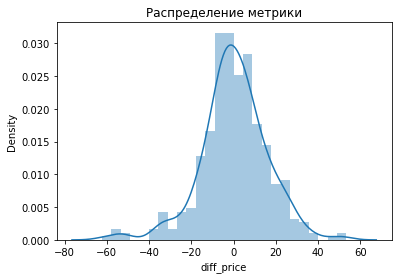

In [ ]:
my_basic_research(column = "diff_price")

В целом наше распределение близко к нормальному, несмотря на остроконечный пик и наличие выбросов.
Однако для уверенности проверим его при помощи графика QQ plot - https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot

График сравнивает квантили выборки и выбранноого распределения - в нашем случае, нормального.

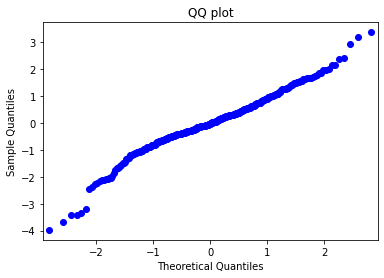

In [ ]:
sm.qqplot(df.diff_price, fit = True)
plt.title("QQ plot")
plt.show()

Кажется, что можно использовать стандартные доверительные интервалы для нормального распределения. Для этого воспользуемся функцией https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
def my_norm_confidence(df=df, column = "diff_price", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [ ]:
confidence = my_norm_confidence()
print(confidence)

(-30.655527059533046, 31.2221800721934)


При доверительной вероятности 95 % средняя разница между ценой закрытия и открытия не выйдет за этот интервал.
Отметим на графике полученный коридор.

Text(0.5, 1.0, 'Доверительный интервал')

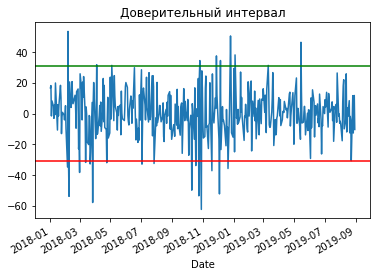

In [ ]:
df.diff_price.plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

## Отбор аномалий при помощи доверительного интервала

А если нам понадобится отметить аномальные события, выходящие за зеленую границу, то это можно сделать следующим образом

In [ ]:
df["anomaly_big"] = np.where(df.diff_price > confidence[1], 1,0)

Теперь они готовы к дальнейшему исследованию.

In [ ]:
df[df.anomaly_big == 1].describe()

,open,high,low,close,adj close,volume,diff_price,anomaly_big
count,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,10.0
mean,1044.146002,1088.186780,1040.519098,1083.051978,1083.051978,2.577930e+06,38.905975,1.0
std,49.937315,50.618170,50.943488,49.617563,49.617563,7.385681e+05,8.221770,0.0
min,989.010010,1028.718018,983.000000,1025.140015,1025.140015,1.719200e+06,31.309937,1.0
25%,1019.470032,1054.092499,1018.459274,1053.339966,1053.339966,2.142750e+06,32.407516,1.0
50%,1033.424988,1076.454956,1029.093994,1071.089966,1071.089966,2.424350e+06,35.969971,1.0
75%,1045.827515,1101.607513,1035.342499,1084.822479,1084.822479,2.698075e+06,44.284973,1.0
max,1144.449951,1176.189941,1144.449951,1175.760010,1175.760010,4.187600e+06,53.419922,1.0


# Мини домашка

Необходимо построить для тех же данных доверительный интервал с доверительной вероятностью 90 %
Сколько аномальных событий находится выше верхней доверительной границы?